# Import Packages

In [1]:
import pandas as pd
import numpy as np 
import csv
import re
import string
import emoji

import nltk
from nltk import pos_tag, pos_tag_sents
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))
#demoji.download_codes()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/manikya_varshney/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
path = '/home/manikya_varshney/Documents/Python/Yale/final_h01-20200912-101538.csv'
data = pd.read_csv(path, low_memory=False)

#####  1. Casing (Upper or lower case)
##### 2. Noise Removal (Removal of punctuation, white spaces, special characters, HTML tags)
##### 3. Tokenization (Tweets to tokens i.e. words seprated by spaces)
##### 4. Stopword Removal
##### 5. Text Normalization (Stemming and Lemmatization)

In [4]:
data['extended_tweet_full_text_duplicate'] = data['extended_tweet_full_text']

In [5]:
#Convert to lower case
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.lower()

In [6]:
#Removing emojis
def demoji(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U00010000-\U0010ffff"
                               "]+", flags=re.UNICODE)
    return(emoji_pattern.sub(r'', text))

data[u'extended_tweet_full_text'] = data[u'extended_tweet_full_text'].astype(str)
data[u'extended_tweet_full_text'] = data[u'extended_tweet_full_text'].apply(lambda x:demoji(x))

In [7]:
#Remove URLs
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.replace(r"http\S+| www\S+| https\S+| \S+\.com\S+| \S+\.com", "", regex=True)

In [8]:
#Remove user @
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.replace(r'\@[\w]+', "", regex=True)

In [9]:
#Remove punctuations
data['extended_tweet_full_text'] = data['extended_tweet_full_text'].str.translate(str.maketrans("", "", string.punctuation))

In [10]:
#More Cleaning
data['extended_tweet_full_text']=data['extended_tweet_full_text'].astype(str).str.replace('/[^a-zA-Z0-9 ]/g', '', regex=True).str.replace('\n',' ', regex=True).str.replace('—',' ', regex=True).str.strip('“').str.strip('”').str.strip('’').str.lstrip(' ').str.rstrip(' ')

In [11]:
#Tokenizing
data.extended_tweet_full_text = data.extended_tweet_full_text.astype(str)
data['tokenized_extended_tweet_full_text'] = data.apply(lambda row: nltk.word_tokenize(row.extended_tweet_full_text), axis=1)

# remove stopwords
data['filtered_extended_tweet_full_text'] = data['tokenized_extended_tweet_full_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [12]:
#Stemming
ps = PorterStemmer()
data['stemmed_extended_tweet_full_text'] = data['filtered_extended_tweet_full_text'].apply(lambda x: [ps.stem(y) for y in x])

In [13]:
#POSTags
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [14]:
#Lemmatizing
lemmatizer = WordNetLemmatizer()
data['lemmatized_extended_tweet_full_text'] = data['filtered_extended_tweet_full_text'].apply(lambda x: [lemmatizer.lemmatize(y, get_wordnet_pos(y)) for y in x])

In [15]:
#Joining the lemmetized tokens to form string
data['final'] = data['lemmatized_extended_tweet_full_text'].apply(lambda x: " ".join([word for word in x]))

In [16]:
#Remove punctuations
data['final'] = data['final'].str.translate(str.maketrans("", "", string.punctuation))
data['final'] = data['final'].str.replace("’", '').str.replace("“", '').str.replace("”", '')
data['extended_tweet_full_text']=data['extended_tweet_full_text'].astype(str).str.replace('/[^a-zA-Z0-9 ]/g', '', regex=True).str.replace('\n',' ', regex=True).str.replace('—',' ', regex=True).str.strip('“').str.strip('”').str.strip('’').str.lstrip(' ').str.rstrip(' ')

In [17]:
cols = [0, 1, 2,3, 8]
data_final = data[data.columns.values[cols]]
data_final.to_csv('final_processed_h01-20200912-101538.csv',index=False)

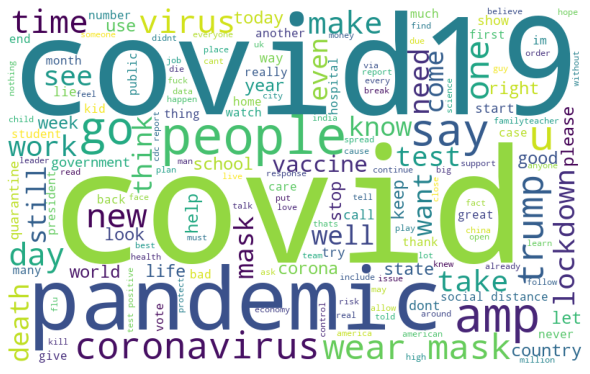

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(data['final'].tolist())
wordcloud = WordCloud(width = 800, height = 500, background_color ='white', min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()